# EVE Economic Report Data
- From the Game EVE

https://www.eveonline.com/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
!ls -GFlash Jun2022/*.csv

608K -rw-r--r-- 1 robmulla 605K Jul  1 10:37 Jun2022/commodity_sinks_and_faucets_history.csv
1.1M -rw-r--r-- 1 robmulla 1.1M Jul  1 10:26 Jun2022/economy_indices_details.csv
1.6M -rw-r--r-- 1 robmulla 1.6M Jul  1 10:26 Jun2022/index_baskets.csv
 61M -rw-r--r-- 1 robmulla  61M Jul  1 10:44 Jun2022/kill_dump.csv
8.0K -rw-r--r-- 1 robmulla 7.0K Jul  1 10:44 Jun2022/mining_by_region.csv
160K -rw-r--r-- 1 robmulla 157K Jul  1 10:44 Jun2022/mining_history_by_security_band.csv
208K -rw-r--r-- 1 robmulla 207K Jul  1 10:27 Jun2022/money_supply.csv
 80K -rw-r--r-- 1 robmulla  80K Jul  1 10:16 Jun2022/produced_destroyed_mined.csv
 12K -rw-r--r-- 1 robmulla  12K Jul  1 10:32 Jun2022/regional_stats.csv
3.5M -rw-r--r-- 1 robmulla 3.5M Jul  1 10:15 Jun2022/sinks_and_faucets_history.csv
 12K -rw-r--r-- 1 robmulla 8.8K Jul  1 10:43 Jun2022/STATIC_ore_type_mapping.csv
4.0K -rw-r--r-- 1 robmulla 1.8K Jul  1 10:15 Jun2022/STATIC_triglavian_sites.csv


In [5]:
kd = pd.read_csv('Jun2022/kill_dump.csv')

In [8]:
enc = pd.read_csv('Jun2022/economy_indices_details.csv')

In [12]:
enc['history_date'] = pd.to_datetime(enc['history_date'])

<AxesSubplot:title={'center':'Ammo Price'}, xlabel='history_date'>

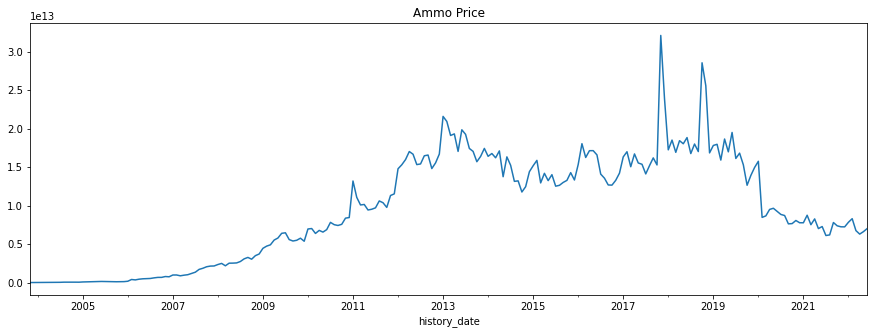

In [22]:
enc.query('sub_index == "Ammo"').sort_values('history_date') \
    .set_index('history_date') \
    ['total_value'].plot(figsize=(15, 5), title='Ammo Price')

### Check out Mining by Region

In [24]:
mining = pd.read_csv('Jun2022/mining_by_region.csv')

In [30]:
mining.head()

,region_id,region_name,asteroid_volume_mined,gas_volume_mined,ice_volume_mined,moon_volume_mined,asteroid_volume_wasted,gas_volume_wasted,ice_volume_wasted,moon_volume_wasted
0,10000001,Derelik,7.341388e+08,14749620.0,4.406600e+08,5.910637e+08,1.291233e+08,2246210.0,93482000.0,86795930.0
1,10000002,The Forge,2.014605e+09,18454480.0,2.752147e+09,7.993877e+08,5.063426e+08,2549730.0,776560000.0,220986680.0
2,10000003,Vale of the Silent,8.375882e+08,23715900.0,1.272864e+09,3.726841e+09,1.863392e+08,6125100.0,324358000.0,459187580.0
3,10000005,Detorid,4.191027e+08,2152940.0,1.865850e+08,1.129802e+09,4.257715e+07,147580.0,32367000.0,79750690.0
4,10000006,Wicked Creek,5.991549e+07,4230150.0,3.793100e+07,4.897457e+08,1.352049e+07,730460.0,11621000.0,14069160.0


In [33]:
mining2= pd.read_csv('Jun2022/mining_history_by_security_band.csv')

In [38]:
# mining2

In [47]:
kd['kill_datetime'] = pd.to_datetime(kd['kill_datetime'])

<AxesSubplot:xlabel='kill_datetime'>

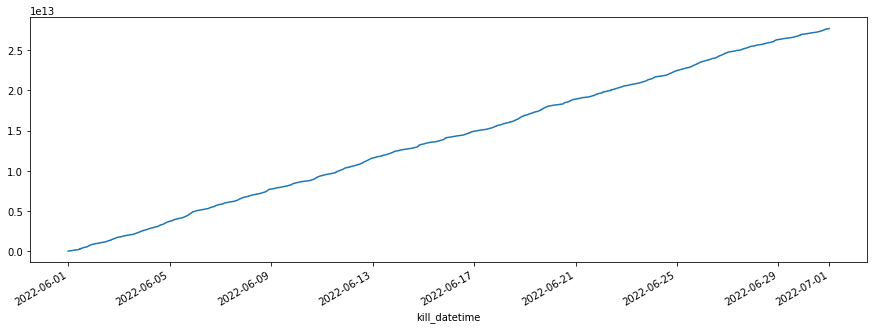

In [53]:
kd.set_index('kill_datetime').sort_index()['isk_lost'] \
    .cumsum().plot(figsize=(15, 5))

In [58]:
kd.head()

,kill_datetime,killer_corporation_id,killer_corporation_name,killer_alliance_name,victim_corporation_id,victim_corporation_name,victim_alliance_name,victim_ship_type_id,victim_ship_type_name,victim_ship_group_name,solarsystem_id,solarsystem_name,region_id,region_name,isk_lost,isk_destroyed,bounty_claimed
0,2022-06-01 00:00:02,306830202,The Tuskers,The Tuskers Co.,98382886,the heavenly Kingdom,Legion of xXDEATHXx,12005,Ishtar,Heavy Assault Cruiser,30000436,SK42-F,10000005,Detorid,2.720860e+08,2.022542e+08,NaN
1,2022-06-01 00:00:10,306830202,The Tuskers,The Tuskers Co.,98382886,the heavenly Kingdom,Legion of xXDEATHXx,670,Capsule,Capsule,30000436,SK42-F,10000005,Detorid,1.352550e+08,1.352550e+08,NaN
2,2022-06-01 00:00:22,98346658,W-Space Squad,NaN,98432986,Pure Victory,NaN,2233,Customs Office,Orbital Infrastructure,31002469,J161215,11000030,F-R00030,9.565805e+07,9.565805e+07,NaN
3,2022-06-01 00:01:20,98655435,Sacrament of War,SACR4MENT,98708926,RRN Industries,NaN,12042,Ishkur,Assault Frigate,30002097,Klogori,10000042,Metropolis,4.225721e+07,3.286033e+07,NaN
4,2022-06-01 00:02:22,1000077,Royal Amarr Institute,NaN,1719660426,NeoCorteX Industry,No Value,33475,Mobile Tractor Unit,Mobile Tractor Unit,30000841,N7-KGJ,10000009,Insmother,1.517433e+07,1.073785e+07,NaN


<AxesSubplot:ylabel='killer_alliance_name'>

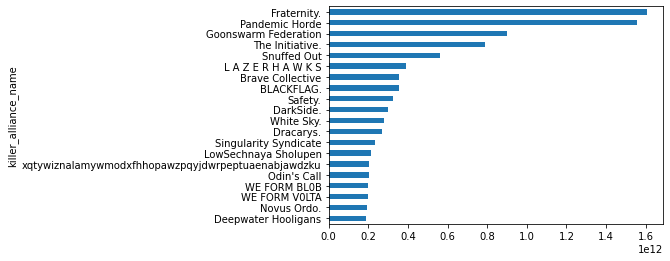

In [64]:
kd.groupby('killer_alliance_name')['isk_lost'] \
    .sum().sort_values().tail(20) \
    .plot(kind='barh')